#                   Venue Structure difference between NY and Boston & Explore the Neighborhood of Boston 

***Flower Yang***

## Table of contents
* <a href='#1'>Introduction and Project Idea: Business Problem</a>
* <a href='#2'>Data Processing</a>
* <a href='#3'>Methodology</a>
* <a href='#4'>Analysis-Results and Discussion</a>
* <a href='#5'>Conclusion</a>

* <a href='#6'>Code Section</a>
    * <a href='#6.1'>Raw Data Processing and clustering</a>
    * <a href='#6.3'>Housing Price Analyze</a>
    * <a href='#6.2'>K Means Classification and SVP </a>
    * <a href='#6.3'>Multiple Linear Regression</a>

<a id='1'></a>
***

## **1. Introduction and Project Idea**

Massachusetts, constituent state of the United States of America. It was one of the original 13 states and is one of the 6 New England states, lying in the northeastern corner of the country. Massachusetts is bounded to the west by New York. Boston city, capital of the commonwealth of Massachusetts, and seat of Suffolk county, in the northeastern United States. It lies on Massachusetts Bay, an arm of the Atlantic Ocean. The city proper has an unusually small area for a major city, and more than one-fourth of the total—including part of the Charles River, Boston Harbor, and a portion of the Atlantic—is water. With an area of 89.63 mi² and a population of 694,583, it is a metro area that is very comparable with New York City, and also a city that harbors many prestigious universities. <br><br>In this Project, I will be comparing the difference between New York City and Boston in the ways that they are similar and dissimilar to each other. Further, I will be exploring the counties within the state of Massachusetts but mainly focus on top 50 cities/towns by population within the state to see what factors (location, venues..) impact the local housing sales price.


Demographic Info :https://www.britannica.com/place/Boston#/media/1/74844/97698
                <br>  https://www.britannica.com/place/Massachusetts


#### Target Audience 

* For those who are deciding between living in NYC or Boston and are interested in exploring the cities and the venues of Massachusetts.



***

<#img src="https://cdn.britannica.com/66/93866-050-64944EF0/Skyline-Boston.jpg" >

<a id='2'></a>
***

## **2. Data Processing**

In this Project, I will be using Fouresqure API (Including location data and explore) and perform data cleaning based on the type of data used. 

* For coordinate information of counties in Massachusetts, I exported the Excel sheet from Data.Healthcare.gov which has all the geocodes in USA. I then filtered out information that is in MA only. Since the population data in the file is outdated, I used the population info from US Census Annual Estimates to update the original file.
                   
                   -source used:
  <br>                 https://data.healthcare.gov/dataset/Geocodes-USA-with-Counties/52wv-g36k
  <br>                 https://worldpopulationreview.com/states/cities/massachusetts
  

* Since Boston has no "Borough", I will be only dealing with 23 offcial neighborhoods.

                    -source used:
 <br>                    https://www.boston.gov/neighborhoods       
   <br>                  https://en.wikipedia.org/wiki/Neighborhoods_in_Boston
               
* For each neighborhood coordinate informarion in Boston, I used the above excel sheet to update the coordinates. Some neighborhoods are missing then I used latlong.net(© Open Street Map) to manually pinpoint the location data respectivly. 


                    -source used:
  <br>                   https://www.latlong.net/
        
* For Housing sales price, I used a housing website - Zillow to find average neighborhood house price. I collected all the above info and put them into a Excel Spreadsheet.For Chinatown/Leather District, since there is no price given on the housing retail website, I used Zillow to find the average house price per square feet by doing weighted averge on 13 representive houses in the neighborhood
    
     -source used:
   <br>       https://www.zillow.com/home-values/
   <br>   http://realestate.boston.com/buying/2018/06/25/what-median-home-value-gets-you-in-boston/
   https://www.realtor.com/realestateandhomes-search/Dorchester_MA/overview
    

* For New York City Geo data, I downloaded it from NYU website.
                   -source used:
  <br>            https://cocl.us/new_york_dataset




#### To Search for a specific venue category
E.X:
> `https://api.foursquare.com/v2/venues/`**search**`?client_id=`**CLIENT_ID**`&client_secret=`**CLIENT_SECRET**`&ll=`**LATITUDE**`,`**LONGITUDE**`&v=`**VERSION**`&query=`**QUERY**`&radius=`**RADIUS**`&limit=`**LIMIT**
>

#### To Explore a Given Venue
E.X:
> `https://api.foursquare.com/v2/venues/`**VENUE_ID**`?client_id=`**CLIENT_ID**`&client_secret=`**CLIENT_SECRET**`&v=`**VERSION**

***

<a id='3'></a>

## **3. Methodology**

For this Project, I will be using different testing algorithm to determine the best predication model and use Foursqure location data to explore the neighborhood.

* K Nearest Neighbor(KNN)
* Support Vector Machine

***

<a id='4'></a>
## 4. Analysis-Results and Discussion


* Despite counting in the factors of different city scales by using population density and using boston city with manhantan downtown, because of fousqure limit and differnet population migration/demographic, the result may be biased toward

    we can see for the both Chinatown in Boston and in Downtown Manhattan, the venue sturcture is slight different as we see in the table below
    
###### ----Chinatown/Leather District  in Boston ----                                        
|       | venue        | freq           | 
 -----: | ------------- |:-------------:| 
   1    | Sandwich Place      | 0.12 |  
   2    | Dim Sum Restaurant      | 0.08      |  
   3    | Asian Restaurant      | 0.08      |   
   4    | Coffee Shop       |0.08         |  
   5    | Bakery      |0.08         |  


###### ----Chinatown/Leather District  in Manhattan ----
|       | venue        | freq           | 
 -----: | ------------- |:-------------:| 
   1    | Chinese Restaurant     | 0.10 |  
   2    |    Bakery      |  0.05      |  
   3    |  Cocktail Bar      | 0.05     |   
   4    | American Restaurant      |0.03         |  
   5    | Salon / Barbershop     |0.03         |  

         


----Financial District----
          venue  freq
0   Coffee Shop  0.10
1           Bar  0.04
2   Pizza Place  0.04
3  Cocktail Bar  0.04
4           Gym  0.04                  

Downtown and nyc finnancial ditrcit, where people work, the coffee shop is the most popular

* The median list price per square foot in Weymouth is 299, which is lower than the Boston-Cambridge-Newton Metro average of 307.

* K means CLuster show no signficant cluster behavior, so I used regresion
***

<a id='5'></a>

## **5. Conclusion**

At the end of the project, I will analyze and conclude my findings

***

<a id='6'></a>

## Code Section

***

<a id='6.1'></a>

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
import json

#Import Raw Excel Files
import os
os.chdir('C:/Users/Owner/Desktop/Coursera/IBM Data Science')
df=pd.read_excel("Boston.xlsx")
df= df.rename(columns={'Neighborhood ': 'Neighborhood'})
df= df.rename(columns={'lat ': 'lat'})

df.head()


,Neighborhood,lat,long,Housing Price Per Squre Feet
0,Allston,42.350000,-71.130000,742.424242
1,Back Bay,42.350266,-71.080978,1077.881041
2,Bay Village,42.348240,-71.068550,1064.814815
3,Beacon Hill,42.360291,-71.068680,827.348066
4,Brighton,42.350000,-71.150000,742.424242


In [2]:
df1=pd.read_csv("MA new population csvData.csv")
df1.head()

,Rank,Name,2020 Pop,2010 Census,Change,Density (km²)
0,1,Boston,"710,195","621,074",14.35%,"5,673"
1,2,Worcester,"186,433","181,878",2.50%,"1,927"
2,3,Springfield,"155,472","153,613",1.21%,"1,884"
3,4,Cambridge,"121,783","105,038",15.94%,"7,354"
4,5,Lowell,"112,626","106,787",5.47%,"3,196"


In [3]:
df2=pd.read_csv("Geocodes_MA_with_Counties.csv")
df2=df2.drop(['state', 'type','world_region','country','decommissioned','notes'], axis=1)
df2.head()


,zip,primary_city,median House Price per squre foot,latitude,longitude,county,estimated_population
0,2128,Boston,758.0,42.35,-71.06,Suffolk,710195
1,1604,Worcester,180.0,42.26,-71.80,Worcester,186433
2,1109,Springfield,127.0,42.11,-72.53,Hampden,155472
3,2125,Dorchester,430.0,42.35,-71.06,Suffolk,124489
4,2139,Cambridge,809.0,42.37,-71.11,Middlesex,121783


In [4]:
print('The dataframe has {} neighborhoods.'.format(len(df['Neighborhood'].unique())))

The dataframe has 22 neighborhoods.


In [5]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)
newyork_data
nyneighborhoods_data = newyork_data['features']

# define the dataframe columns
nycolumn_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
nyneighborhoods = pd.DataFrame(columns=nycolumn_names)

for data in nyneighborhoods_data:
    borough = nyneighborhood_name = data['properties']['borough'] 
    nyneighborhood_name = data['properties']['name']
        
    nyneighborhood_latlon = data['geometry']['coordinates']
    nyneighborhood_lat = nyneighborhood_latlon[1]
    nyneighborhood_lon = nyneighborhood_latlon[0]
    
    nyneighborhoods = nyneighborhoods.append({'Borough': borough,
                                          'Neighborhood': nyneighborhood_name,
                                          'Latitude': nyneighborhood_lat,
                                          'Longitude': nyneighborhood_lon}, ignore_index=True)
nyneighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [6]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(nyneighborhoods['Borough'].unique()),
        nyneighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


In [7]:
from geopy.geocoders import Nominatim
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans
import folium # map rendering library

print('Libraries imported.')

address = 'Boston, MA'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Boston City are {}, {}.'.format(latitude, longitude))

Libraries imported.
The geograpical coordinate of Boston City are 42.3602534, -71.0582912.


In [8]:
# create map of Boston using latitude and longitude values
map_bos = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(df['lat'], df['long'], df['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_bos)  
    
map_bos

#df['lat']

In [9]:
manhattan_data = nyneighborhoods[nyneighborhoods['Borough'] == 'Manhattan'].reset_index(drop=True)
#Downtown Manhattan
lowermanhattan_data=manhattan_data[(manhattan_data['Neighborhood']=='East Village') | (manhattan_data['Neighborhood']=='West Village') | (manhattan_data['Neighborhood']=='West Village')| (manhattan_data['Neighborhood']=='Soho')| (manhattan_data['Neighborhood']=='Tribeca')| (manhattan_data['Neighborhood']=='Noho')| (manhattan_data['Neighborhood']=='Battery Park City')| (manhattan_data['Neighborhood']=='Little Italy')  | (manhattan_data['Neighborhood']=='Lower East Side') | (manhattan_data['Neighborhood']=='Chinatown') | (manhattan_data['Neighborhood']=='Greenwich Village') | (manhattan_data['Neighborhood']=='Financial District') | (manhattan_data['Neighborhood']=='Civic Center') ].reset_index(drop=True)
lowermanhattan_data.head(20)

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Chinatown,40.715618,-73.994279
1,Manhattan,Greenwich Village,40.726933,-73.999914
2,Manhattan,East Village,40.727847,-73.982226
3,Manhattan,Lower East Side,40.717807,-73.980890
4,Manhattan,Tribeca,40.721522,-74.010683
5,Manhattan,Little Italy,40.719324,-73.997305
6,Manhattan,Soho,40.722184,-74.000657
7,Manhattan,West Village,40.734434,-74.006180
8,Manhattan,Battery Park City,40.711932,-74.016869
9,Manhattan,Financial District,40.707107,-74.010665


In [10]:
# create map of Manhattan using latitude and longitude values
address = 'Manhattan, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Lower Manhattan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Lower Manhattan are 40.7896239, -73.9598939.


In [11]:
map_Manhattan = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(manhattan_data['Latitude'], manhattan_data['Longitude'], manhattan_data['Borough'], manhattan_data['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Manhattan)  
    
map_Manhattan

In [12]:
CLIENT_ID = 'FZGYALQCQANGLZIOZBINJRD4WOTMXTN5LRVMGQ4MFHOWFDGQ' # your Foursquare ID
CLIENT_SECRET = 'MCMKNYLSIQ02QPXRWQ5TE3C331MZ5MPCI1Z3QK4MSWKNYFIQ' # your Foursquare Secret
VERSION = '20200723' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: FZGYALQCQANGLZIOZBINJRD4WOTMXTN5LRVMGQ4MFHOWFDGQ
CLIENT_SECRET:MCMKNYLSIQ02QPXRWQ5TE3C331MZ5MPCI1Z3QK4MSWKNYFIQ


In [13]:
# Explore Downtown Boston 
dt_data = df[df['Neighborhood'] == 'Downtown'].reset_index(drop=True)

neighborhood_latitude = dt_data['lat'][0] # neighborhood latitude value
neighborhood_longitude = dt_data['long'][0] # neighborhood longitude value

dt_name = dt_data['Neighborhood'][0]# neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(dt_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Downtown are 42.355301, -71.055283.


In [14]:
LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 500 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    'FZGYALQCQANGLZIOZBINJRD4WOTMXTN5LRVMGQ4MFHOWFDGQ', 
    'MCMKNYLSIQ02QPXRWQ5TE3C331MZ5MPCI1Z3QK4MSWKNYFIQ', 
    '20200717', 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL


'https://api.foursquare.com/v2/venues/explore?&client_id=FZGYALQCQANGLZIOZBINJRD4WOTMXTN5LRVMGQ4MFHOWFDGQ&client_secret=MCMKNYLSIQ02QPXRWQ5TE3C331MZ5MPCI1Z3QK4MSWKNYFIQ&v=20200717&ll=42.355301,-71.055283&radius=500&limit=100'

In [15]:
import json # library to handle JSON files
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f1caa682321bc05cdbd1a25'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'},
    {'name': '$-$$$$', 'key': 'price'}]},
  'headerLocation': 'Financial District',
  'headerFullLocation': 'Financial District, Boston',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 69,
  'suggestedBounds': {'ne': {'lat': 42.3598010045, 'lng': -71.04920489860407},
   'sw': {'lat': 42.350800995499995, 'lng': -71.06136110139593}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '577be842498e0a21aa1cc211',
       'name': 'Clover Food Lab FIN',
       'location': {'address': '160 Federal St',
        'lat': 42.35371525349005,
        'lng': -71.05621626380778,
        'labeledL

In [16]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [17]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

<ipython-input-17-561c05f0fdd1>:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues = json_normalize(venues) # flatten JSON


,name,categories,lat,lng
0,Clover Food Lab FIN,Vegetarian / Vegan Restaurant,42.353715,-71.056216
1,Kane's Donuts,Donut Shop,42.356209,-71.052895
2,Boston Wine Exchange,Wine Shop,42.356070,-71.057420
3,The Langham Boston Hotel,Hotel,42.356482,-71.054501
4,Equinox Franklin Street,Gym,42.356074,-71.054484


In [18]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

69 venues were returned by Foursquare.


In [19]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            'FZGYALQCQANGLZIOZBINJRD4WOTMXTN5LRVMGQ4MFHOWFDGQ', 
            'MCMKNYLSIQ02QPXRWQ5TE3C331MZ5MPCI1Z3QK4MSWKNYFIQ', 
            '20200723', 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [20]:
boston_venues = getNearbyVenues(names=df['Neighborhood'],
                                   latitudes=df['lat'],
                                   longitudes=df['long']
                                  )


Allston
Back Bay
Bay Village
Beacon Hill
Brighton
Charlestown
Chinatown/Leather District
Dorchester (divided for planning purposes into Mid Dorchester and Dorchester)
Downtown
East Boston
Fenway Kenmore (includes Longwood)
Hyde Park
Jamaica Plain
Mattapan
Mission Hill
North End
Roslindale
Roxbury
South Boston
South End
West End
West Roxbury


In [21]:
print(boston_venues.shape)
boston_venues.head()

(802, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Allston,42.35,-71.13,Great Scott,42.350231,-71.130822,Rock Club
1,Allston,42.35,-71.13,Tous les Jours,42.351753,-71.131665,Bakery
2,Allston,42.35,-71.13,FroyoWorld - Frozen Yogurt Lounge,42.351608,-71.131662,Frozen Yogurt Shop
3,Allston,42.35,-71.13,Shabu Zen,42.352678,-71.129113,Japanese Restaurant
4,Allston,42.35,-71.13,T.J. Maxx,42.348691,-71.129245,Department Store


In [22]:
print('There are {} uniques categories.'.format(len(boston_venues['Venue Category'].unique())))

There are 169 uniques categories.


In [23]:
# one hot encoding
bos_onehot = pd.get_dummies(boston_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
bos_onehot['Neighborhood'] = boston_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [bos_onehot.columns[-1]] + list(bos_onehot.columns[:-1])
bos_onehot = bos_onehot[fixed_columns]

bos_onehot.head()

,Neighborhood,Accessories Store,African Restaurant,American Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Automotive Shop,...,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo Exhibit
0,Allston,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Allston,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Allston,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Allston,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Allston,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
bos_onehot.shape

(802, 170)

In [25]:
bos_grouped = bos_onehot.groupby('Neighborhood').mean().reset_index()
bos_grouped

,Neighborhood,Accessories Store,African Restaurant,American Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Automotive Shop,...,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo Exhibit
0,Allston,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.020408,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.040816,0.000000,0.000000,0.00,0.020408,0.000000
1,Back Bay,0.01,0.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,...,0.01,0.000000,0.000000,0.000000,0.010000,0.010000,0.010000,0.02,0.000000,0.000000
2,Bay Village,0.00,0.000000,0.069767,0.000000,0.000000,0.023256,0.000000,0.000000,0.000000,...,0.00,0.000000,0.023256,0.000000,0.000000,0.023256,0.023256,0.00,0.000000,0.000000
3,Beacon Hill,0.00,0.000000,0.047619,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.023810,0.000000
4,Brighton,0.00,0.000000,0.032258,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.032258,0.00,0.000000,0.000000
5,Charlestown,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.047619,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
6,Chinatown/Leather District,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.076923,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.038462,0.000000,0.00,0.000000,0.000000
7,Dorchester (divided for planning purposes into...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
8,Downtown,0.00,0.000000,0.028986,0.000000,0.000000,0.000000,0.043478,0.000000,0.000000,...,0.00,0.000000,0.014493,0.014493,0.000000,0.014493,0.014493,0.00,0.000000,0.000000
9,East Boston,0.00,0.000000,0.020000,0.000000,0.000000,0.000000,0.060000,0.000000,0.000000,...,0.00,0.000000,0.010000,0.000000,0.010000,0.020000,0.000000,0.00,0.010000,0.000000


In [26]:
bos_grouped.shape

(20, 170)

In [27]:
#remember to weight
num_top_venues = 5 

for hood in bos_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = bos_grouped[bos_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Allston----
                   venue  freq
0     Chinese Restaurant  0.08
1     Mexican Restaurant  0.06
2      Korean Restaurant  0.06
3              Rock Club  0.04
4  Vietnamese Restaurant  0.04


----Back Bay----
                 venue  freq
0          Coffee Shop  0.07
1       Ice Cream Shop  0.05
2   Seafood Restaurant  0.05
3  American Restaurant  0.05
4       Clothing Store  0.05


----Bay Village----
                   venue  freq
0                Theater  0.12
1                  Hotel  0.07
2    American Restaurant  0.07
3  Performing Arts Venue  0.05
4               Dive Bar  0.05


----Beacon Hill----
                 venue  freq
0          Pizza Place  0.07
1            Hotel Bar  0.07
2   Italian Restaurant  0.07
3  American Restaurant  0.05
4           Food Truck  0.05


----Brighton----
                venue  freq
0              Bakery  0.10
1  Chinese Restaurant  0.06
2                 Pub  0.06
3         Pizza Place  0.06
4                Café  0.06


----Charlest

In [28]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [29]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = bos_grouped['Neighborhood']

for ind in np.arange(bos_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(bos_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Allston,Chinese Restaurant,Mexican Restaurant,Korean Restaurant,Rock Club,Vietnamese Restaurant,Indian Restaurant,Pizza Place,Fried Chicken Joint,Bakery,Coffee Shop
1,Back Bay,Coffee Shop,Ice Cream Shop,Seafood Restaurant,American Restaurant,Clothing Store,Italian Restaurant,Hotel,Bar,Mediterranean Restaurant,Plaza
2,Bay Village,Theater,American Restaurant,Hotel,Performing Arts Venue,Pizza Place,Italian Restaurant,Dive Bar,Bakery,French Restaurant,Seafood Restaurant
3,Beacon Hill,Pizza Place,Hotel Bar,Italian Restaurant,Food Truck,American Restaurant,Gourmet Shop,Ice Cream Shop,Coffee Shop,Burrito Place,Food & Drink Shop
4,Brighton,Bakery,Café,Pizza Place,Chinese Restaurant,Bank,Pub,Coffee Shop,Bus Station,Fast Food Restaurant,Sandwich Place


In [30]:
# set number of clusters
kclusters = 6

bos_grouped_clustering = bos_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(bos_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

bos_merged = df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
bos_merged = bos_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

bos_merged.head() 


,Neighborhood,lat,long,Housing Price Per Squre Feet,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Allston,42.350000,-71.130000,742.424242,2.0,Chinese Restaurant,Mexican Restaurant,Korean Restaurant,Rock Club,Vietnamese Restaurant,Indian Restaurant,Pizza Place,Fried Chicken Joint,Bakery,Coffee Shop
1,Back Bay,42.350266,-71.080978,1077.881041,2.0,Coffee Shop,Ice Cream Shop,Seafood Restaurant,American Restaurant,Clothing Store,Italian Restaurant,Hotel,Bar,Mediterranean Restaurant,Plaza
2,Bay Village,42.348240,-71.068550,1064.814815,2.0,Theater,American Restaurant,Hotel,Performing Arts Venue,Pizza Place,Italian Restaurant,Dive Bar,Bakery,French Restaurant,Seafood Restaurant
3,Beacon Hill,42.360291,-71.068680,827.348066,2.0,Pizza Place,Hotel Bar,Italian Restaurant,Food Truck,American Restaurant,Gourmet Shop,Ice Cream Shop,Coffee Shop,Burrito Place,Food & Drink Shop
4,Brighton,42.350000,-71.150000,742.424242,2.0,Bakery,Café,Pizza Place,Chinese Restaurant,Bank,Pub,Coffee Shop,Bus Station,Fast Food Restaurant,Sandwich Place


In [31]:
# bos_merged['lat']=bos_merged['lat'].astype('int')
# bos_merged['long']=bos_merged['long'].astype('int')
# #bos_merged['Cluster Labels']= bos_merged['Cluster Labels'].astype('int')
# bos_merged.dtypes

# latitude=int(latitude)
# longitude=int(longitude)

In [32]:
#Get all venues in Downtown Manhattan 
dtmanhattan_venues = getNearbyVenues(names=lowermanhattan_data['Neighborhood'],
                                   latitudes=lowermanhattan_data['Latitude'],
                                   longitudes=lowermanhattan_data['Longitude']
                                  )

lowermanhattan_data

Chinatown
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Battery Park City
Financial District
Noho
Civic Center


,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Chinatown,40.715618,-73.994279
1,Manhattan,Greenwich Village,40.726933,-73.999914
2,Manhattan,East Village,40.727847,-73.982226
3,Manhattan,Lower East Side,40.717807,-73.980890
4,Manhattan,Tribeca,40.721522,-74.010683
5,Manhattan,Little Italy,40.719324,-73.997305
6,Manhattan,Soho,40.722184,-74.000657
7,Manhattan,West Village,40.734434,-74.006180
8,Manhattan,Battery Park City,40.711932,-74.016869
9,Manhattan,Financial District,40.707107,-74.010665


In [33]:
print(dtmanhattan_venues.shape)
dtmanhattan_venues.head()

#10,975- 162,9000 pop
#13841 66940 4.836 density per square mile


(1093, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Chinatown,40.715618,-73.994279,Cheeky Sandwiches,40.715821,-73.991830,Sandwich Place
1,Chinatown,40.715618,-73.994279,Hotel 50 Bowery NYC,40.715936,-73.996789,Hotel
2,Chinatown,40.715618,-73.994279,Kiki's,40.714476,-73.992036,Greek Restaurant
3,Chinatown,40.715618,-73.994279,Scarr's Pizza,40.715335,-73.991649,Pizza Place
4,Chinatown,40.715618,-73.994279,Spicy Village,40.717010,-73.993530,Chinese Restaurant


In [34]:
dtmanhattan_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Battery Park City,66,66,66,66,66,66
Chinatown,100,100,100,100,100,100
Civic Center,100,100,100,100,100,100
East Village,100,100,100,100,100,100
Financial District,100,100,100,100,100,100
Greenwich Village,100,100,100,100,100,100
Little Italy,100,100,100,100,100,100
Lower East Side,49,49,49,49,49,49
Noho,100,100,100,100,100,100


In [35]:
print('There are {} uniques categories.'.format(len(dtmanhattan_venues['Venue Category'].unique())))

There are 217 uniques categories.


In [36]:
# one hot encoding
dtmanhattan_onehot = pd.get_dummies(dtmanhattan_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
dtmanhattan_onehot['Neighborhood'] = dtmanhattan_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [dtmanhattan_onehot.columns[-1]] + list(dtmanhattan_onehot.columns[:-1])
dtmanhattan_onehot = dtmanhattan_onehot[fixed_columns]

dtmanhattan_onehot.head()

,Neighborhood,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,...,Used Bookstore,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant,Volleyball Court,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Chinatown,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Chinatown,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Chinatown,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Chinatown,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Chinatown,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
dtmanhattan_onehot.shape

(1093, 218)

In [38]:
dtmanhattan_grouped = dtmanhattan_onehot.groupby('Neighborhood').mean().reset_index()
dtmanhattan_grouped

,Neighborhood,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,...,Used Bookstore,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant,Volleyball Court,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Battery Park City,0.015152,0.00,0.00,0.000000,0.000000,0.00,0.00,0.015152,0.015152,...,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.015152,0.000000,0.000000
1,Chinatown,0.030000,0.00,0.00,0.000000,0.000000,0.00,0.02,0.000000,0.000000,...,0.00,0.010000,0.00,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000
2,Civic Center,0.030000,0.01,0.00,0.000000,0.010000,0.00,0.01,0.000000,0.000000,...,0.00,0.010000,0.00,0.000000,0.000000,0.000000,0.010000,0.020000,0.000000,0.030000
3,East Village,0.020000,0.00,0.01,0.010000,0.010000,0.01,0.00,0.000000,0.000000,...,0.01,0.020000,0.00,0.020000,0.000000,0.000000,0.030000,0.010000,0.000000,0.000000
4,Financial District,0.030000,0.00,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.000000,...,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.020000,0.010000,0.000000
5,Greenwich Village,0.020000,0.00,0.00,0.000000,0.010000,0.00,0.00,0.000000,0.000000,...,0.00,0.000000,0.00,0.020000,0.000000,0.000000,0.010000,0.000000,0.000000,0.010000
6,Little Italy,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.000000,...,0.00,0.020000,0.00,0.010000,0.000000,0.000000,0.020000,0.010000,0.010000,0.010000
7,Lower East Side,0.000000,0.00,0.00,0.020408,0.040816,0.00,0.00,0.000000,0.000000,...,0.00,0.000000,0.00,0.020408,0.000000,0.000000,0.000000,0.000000,0.020408,0.020408
8,Noho,0.010000,0.00,0.00,0.010000,0.020000,0.00,0.02,0.000000,0.000000,...,0.00,0.010000,0.01,0.000000,0.000000,0.000000,0.020000,0.020000,0.000000,0.020000
9,Soho,0.010000,0.00,0.00,0.000000,0.020000,0.01,0.00,0.000000,0.000000,...,0.00,0.020000,0.00,0.000000,0.000000,0.000000,0.020000,0.000000,0.020000,0.010000


In [39]:
dtmanhattan_grouped.shape

(12, 218)

In [40]:
num_top_venues = 5

for hood in dtmanhattan_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = dtmanhattan_grouped[dtmanhattan_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Battery Park City----
           venue  freq
0           Park  0.09
1          Hotel  0.08
2            Gym  0.06
3    Coffee Shop  0.06
4  Memorial Site  0.05


----Chinatown----
                 venue  freq
0   Chinese Restaurant  0.10
1               Bakery  0.05
2         Cocktail Bar  0.05
3  American Restaurant  0.03
4   Salon / Barbershop  0.03


----Civic Center----
                venue  freq
0         Coffee Shop  0.08
1               Hotel  0.05
2        Cocktail Bar  0.05
3                 Spa  0.04
4  Italian Restaurant  0.04


----East Village----
                venue  freq
0                 Bar  0.07
1      Ice Cream Shop  0.05
2         Pizza Place  0.05
3        Cocktail Bar  0.04
4  Mexican Restaurant  0.04


----Financial District----
          venue  freq
0   Coffee Shop  0.10
1           Bar  0.04
2   Pizza Place  0.04
3  Cocktail Bar  0.04
4           Gym  0.04


----Greenwich Village----
                venue  freq
0  Italian Restaurant  0.12
1    Sushi Rest

In [41]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [42]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = dtmanhattan_grouped['Neighborhood']

for ind in np.arange(dtmanhattan_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(dtmanhattan_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Battery Park City,Park,Hotel,Gym,Coffee Shop,Memorial Site,Playground,Shopping Mall,Gourmet Shop,Plaza,Food Court
1,Chinatown,Chinese Restaurant,Bakery,Cocktail Bar,American Restaurant,Bubble Tea Shop,Dessert Shop,Ice Cream Shop,Salon / Barbershop,Spa,Vietnamese Restaurant
2,Civic Center,Coffee Shop,Cocktail Bar,Hotel,Spa,Gym / Fitness Center,Italian Restaurant,Yoga Studio,Bakery,Café,French Restaurant
3,East Village,Bar,Pizza Place,Ice Cream Shop,Mexican Restaurant,Cocktail Bar,Wine Bar,Coffee Shop,Italian Restaurant,Dessert Shop,Korean Restaurant
4,Financial District,Coffee Shop,Gym,Bar,Pizza Place,Cocktail Bar,Hotel,Italian Restaurant,Mexican Restaurant,Park,Gym / Fitness Center


In [43]:
# set number of clusters
kclusters = 6

dtmanhattan_grouped_clustering = dtmanhattan_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(dtmanhattan_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([4, 2, 0, 1, 0, 3, 3, 5, 1, 3])

In [44]:
    # add clustering labels
    neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

    dtmanhattan_merged = lowermanhattan_data

    # merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
    dtmanhattan_merged = dtmanhattan_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

    dtmanhattan_merged.head(10) # 

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Manhattan,Chinatown,40.715618,-73.994279,2,Chinese Restaurant,Bakery,Cocktail Bar,American Restaurant,Bubble Tea Shop,Dessert Shop,Ice Cream Shop,Salon / Barbershop,Spa,Vietnamese Restaurant
1,Manhattan,Greenwich Village,40.726933,-73.999914,3,Italian Restaurant,Sushi Restaurant,Café,Indian Restaurant,French Restaurant,Bubble Tea Shop,Ice Cream Shop,Gym,Sandwich Place,Gourmet Shop
2,Manhattan,East Village,40.727847,-73.982226,1,Bar,Pizza Place,Ice Cream Shop,Mexican Restaurant,Cocktail Bar,Wine Bar,Coffee Shop,Italian Restaurant,Dessert Shop,Korean Restaurant
3,Manhattan,Lower East Side,40.717807,-73.980890,5,Chinese Restaurant,Coffee Shop,Café,Art Gallery,Japanese Restaurant,Pizza Place,Bakery,Ramen Restaurant,Cocktail Bar,Clothing Store
4,Manhattan,Tribeca,40.721522,-74.010683,0,Park,Italian Restaurant,Café,Spa,Coffee Shop,American Restaurant,Wine Bar,Bakery,Poke Place,Wine Shop
5,Manhattan,Little Italy,40.719324,-73.997305,3,Bakery,Café,Italian Restaurant,Chinese Restaurant,Ice Cream Shop,Coffee Shop,Cocktail Bar,Thai Restaurant,Sandwich Place,Salon / Barbershop
6,Manhattan,Soho,40.722184,-74.000657,3,Italian Restaurant,Coffee Shop,French Restaurant,Mediterranean Restaurant,Clothing Store,Salon / Barbershop,Bakery,Boutique,Women's Store,Furniture / Home Store
7,Manhattan,West Village,40.734434,-74.006180,1,Italian Restaurant,New American Restaurant,American Restaurant,Park,Cocktail Bar,Theater,Wine Bar,Jazz Club,French Restaurant,Cosmetics Shop
8,Manhattan,Battery Park City,40.711932,-74.016869,4,Park,Hotel,Gym,Coffee Shop,Memorial Site,Playground,Shopping Mall,Gourmet Shop,Plaza,Food Court
9,Manhattan,Financial District,40.707107,-74.010665,0,Coffee Shop,Gym,Bar,Pizza Place,Cocktail Bar,Hotel,Italian Restaurant,Mexican Restaurant,Park,Gym / Fitness Center


<a id='6.2'></a>
## Housing Price in Massachusetts

In [45]:
# top 50 cities in Massachusetts by sorted by population 
dfma50=df2.head(50)
dfma50

,zip,primary_city,median House Price per squre foot,latitude,longitude,county,estimated_population
0,2128,Boston,758.0,42.35,-71.06,Suffolk,710195
1,1604,Worcester,180.0,42.26,-71.80,Worcester,186433
2,1109,Springfield,127.0,42.11,-72.53,Hampden,155472
3,2125,Dorchester,430.0,42.35,-71.06,Suffolk,124489
4,2139,Cambridge,809.0,42.37,-71.11,Middlesex,121783
5,1852,Lowell,208.0,42.63,-71.32,Middlesex,112626
6,2301,Brockton,222.0,42.08,-71.02,Plymouth,96313
7,1902,Lynn,281.0,42.47,-70.96,Essex,96032
8,2740,New Bedford,184.0,41.66,-70.93,Bristol,95155
9,2169,Quincy,380.0,42.26,-71.00,Norfolk,94948


In [46]:
def getMANearbyVenues(names, latitudes, longitudes, radius=750):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            'FZGYALQCQANGLZIOZBINJRD4WOTMXTN5LRVMGQ4MFHOWFDGQ', 
            'MCMKNYLSIQ02QPXRWQ5TE3C331MZ5MPCI1Z3QK4MSWKNYFIQ', 
            '20200725', 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City', 
                  'City Latitude', 
                  'City Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [47]:
#Get all venues in Top 50 MA City  
ma50_venues = getMANearbyVenues(names=dfma50['primary_city'],
                                   latitudes=dfma50['latitude'],
                                   longitudes=dfma50['longitude']   
                                  )


Boston
Worcester
Springfield
Dorchester
Cambridge
Lowell
Brockton
Lynn
New Bedford
Quincy
Fall River
Newton
Somerville
Lawrence
Framingham
Haverhill
Waltham
Malden
Weymouth
Brookline
Medford
Taunton
Chicopee
Revere
Peabody
Methuen
Everett
Attleboro
Arlington
Salem
Beverly
Leominster
Pittsfield
Westfield
Fitchburg
Woburn
Holyoke
Chelsea
Marlborough
Braintree
Watertown
Dorchester Center
Lexington
Gloucester
Shrewsbury
Needham
Norwood
Wellesley
Natick
Melrose


In [48]:
print(ma50_venues.shape)
ma50_venues.head()
#print(ma50_venues[ma50_venues["City"] =='Brookline'])

(1404, 7)


,City,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Boston,42.35,-71.06,Shabu Zen,42.350922,-71.060942,Asian Restaurant
1,Boston,42.35,-71.06,Crave - Mad for Chicken,42.350378,-71.060786,Korean Restaurant
2,Boston,42.35,-71.06,Gracenote Coffee,42.351657,-71.058204,Coffee Shop
3,Boston,42.35,-71.06,Shojo,42.351028,-71.060736,Asian Restaurant
4,Boston,42.35,-71.06,Tora,42.350782,-71.060916,Japanese Restaurant


In [49]:
ma50summary=ma50_venues.groupby('City').count().reset_index()
print(ma50summary.shape)
ma50summary

(48, 7)


,City,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Arlington,6,6,6,6,6,6
1,Attleboro,7,7,7,7,7,7
2,Beverly,8,8,8,8,8,8
3,Boston,100,100,100,100,100,100
4,Braintree,41,41,41,41,41,41
5,Brockton,13,13,13,13,13,13
6,Cambridge,94,94,94,94,94,94
7,Chelsea,19,19,19,19,19,19
8,Chicopee,33,33,33,33,33,33
9,Dorchester,100,100,100,100,100,100


Text(0.5, 1.0, 'Number of City Venue Category')

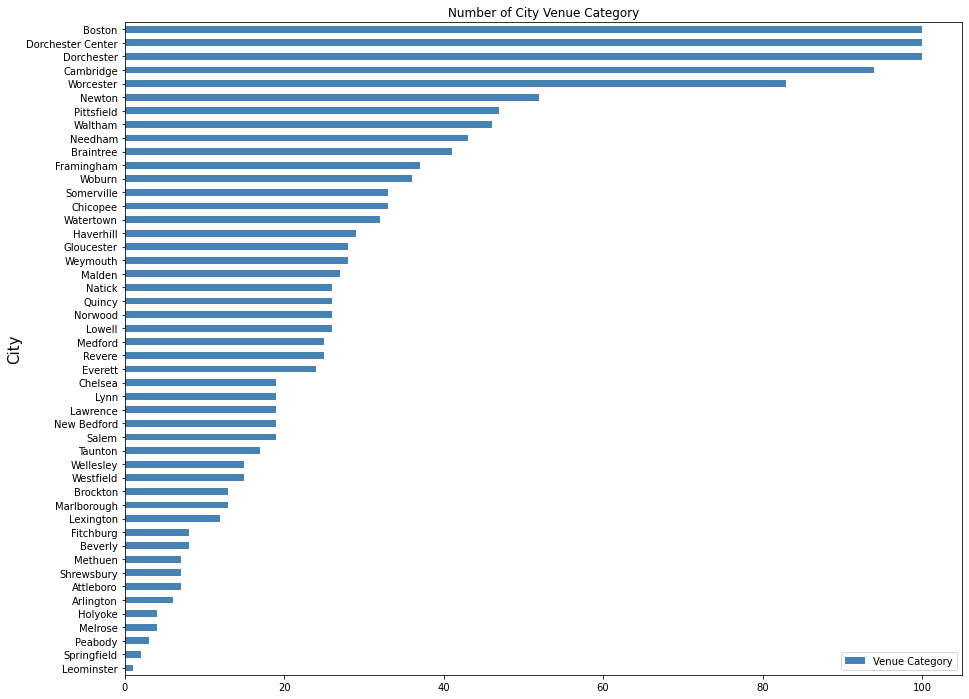

In [50]:
ma50summary_sort1=ma50summary.sort_values(by=['Venue'],inplace=True)
ma50summary_sort1=ma50summary[['City','Venue Category']]
ma50summary_sort1.set_index('City', drop=True,inplace=True)
ma50summary_sort1.columns


# fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(24, 10))
ma50summary_sort1.plot(kind='barh',color='steelblue',figsize=(15, 12))
plt.ylabel('City',fontsize=15)
plt.title('Number of City Venue Category' )

In [51]:
# one hot encoding
ma_onehot = pd.get_dummies(ma50_venues[['Venue Category']], prefix="", prefix_sep="")

# add city column back to dataframe
ma_onehot['City'] = ma50_venues['City'] 

# move city column to the first column
fixed_columns = [ma_onehot.columns[-1]] + list(ma_onehot.columns[:-1])
ma_onehot = ma_onehot[fixed_columns]

ma_onehot.shape

#group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
ma_grouped = ma_onehot.groupby('City').mean().reset_index()
ma_grouped

,City,ATM,American Restaurant,Antique Shop,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,...,Venezuelan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Yoga Studio
0,Arlington,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Attleboro,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Beverly,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Boston,0.000000,0.010000,0.000000,0.000000,0.010000,0.000000,0.050000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.020000,0.010000,0.000000,0.010000
4,Braintree,0.000000,0.000000,0.000000,0.000000,0.000000,0.024390,0.000000,0.000000,0.000000,...,0.000000,0.024390,0.000000,0.000000,0.000000,0.000000,0.000000,0.024390,0.000000,0.000000
5,Brockton,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,0.076923,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Cambridge,0.000000,0.010638,0.000000,0.010638,0.021277,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.021277
7,Chelsea,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,Chicopee,0.000000,0.060606,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030303,...,0.000000,0.000000,0.000000,0.000000,0.030303,0.000000,0.000000,0.000000,0.030303,0.000000
9,Dorchester,0.000000,0.010000,0.000000,0.000000,0.010000,0.000000,0.050000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.020000,0.010000,0.000000,0.010000


In [52]:
ma_grouped.shape

(48, 229)

In [53]:
#print each neighborhood along with the top 5 most common venues

num_top_venues = 5

for hood in ma_grouped['City']:
    print("----"+hood+"----")
    temp = ma_grouped[ma_grouped['City'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Arlington----
            venue  freq
0          Garden  0.33
1      Playground  0.17
2  Scenic Lookout  0.17
3            Park  0.17
4         Brewery  0.17


----Attleboro----
           venue  freq
0    Pizza Place  0.14
1     Donut Shop  0.14
2  Grocery Store  0.14
3   Liquor Store  0.14
4   Home Service  0.14


----Beverly----
            venue  freq
0           Beach  0.50
1  Scenic Lookout  0.12
2             Pub  0.12
3           Hotel  0.12
4      Bagel Shop  0.12


----Boston----
                venue  freq
0  Chinese Restaurant  0.07
1              Bakery  0.06
2         Coffee Shop  0.06
3    Asian Restaurant  0.05
4      Sandwich Place  0.04


----Braintree----
              venue  freq
0  Department Store  0.10
1    Sandwich Place  0.05
2               Bar  0.05
3    Mattress Store  0.05
4        Donut Shop  0.05


----Brockton----
                  venue  freq
0  Gym / Fitness Center  0.15
1        Discount Store  0.08
2                   Pub  0.08
3                 

In [54]:
#new dataframe to display the top 10 venues for each neighborhood
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['City']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['City'] = ma_grouped['City']

for ind in np.arange(ma_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(ma_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(10)

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Arlington,Garden,Brewery,Playground,Scenic Lookout,Park,Event Service,Food Truck,Food & Drink Shop,Food,Flower Shop
1,Attleboro,Donut Shop,Grocery Store,Big Box Store,Discount Store,Home Service,Pizza Place,Liquor Store,Fishing Store,Farmers Market,Fast Food Restaurant
2,Beverly,Beach,Pub,Hotel,Scenic Lookout,Bagel Shop,Fast Food Restaurant,Falafel Restaurant,Farm,Farmers Market,Fishing Store
3,Boston,Chinese Restaurant,Bakery,Coffee Shop,Asian Restaurant,Sandwich Place,Theater,Italian Restaurant,Gym / Fitness Center,Sushi Restaurant,Performing Arts Venue
4,Braintree,Department Store,Bar,Donut Shop,Convenience Store,Sandwich Place,Italian Restaurant,Mattress Store,Sports Bar,Lawyer,Chinese Restaurant
5,Brockton,Gym / Fitness Center,Pub,Donut Shop,Chinese Restaurant,Lounge,Café,Smoke Shop,Automotive Shop,Asian Restaurant,Discount Store
6,Cambridge,Coffee Shop,Grocery Store,Café,Burger Joint,Pub,Sandwich Place,Vegetarian / Vegan Restaurant,Bookstore,Yoga Studio,Gym
7,Chelsea,Mexican Restaurant,Hotel,Bank,Post Office,Pharmacy,Discount Store,Rental Car Location,Donut Shop,Fast Food Restaurant,Café
8,Chicopee,Hotel,Discount Store,Salon / Barbershop,American Restaurant,Mexican Restaurant,Fast Food Restaurant,Burger Joint,Mobile Phone Shop,Chinese Restaurant,Sandwich Place
9,Dorchester,Chinese Restaurant,Bakery,Coffee Shop,Asian Restaurant,Sandwich Place,Theater,Italian Restaurant,Gym / Fitness Center,Sushi Restaurant,Performing Arts Venue


<a id='6.3'></a>
### K Nearest Neighbor(KNN)

In [55]:
dfma=dfma50.rename(columns={'primary_city': 'City'})
#ma50summary.columns
#dfs['median House Price psf']= np.where(dfma['City']==ma50summary['City'], dfma['median House Price psf'])

dfs = pd.merge(ma50summary,  
                      dfma,  
                      on ='City',  
                      how ='inner')
dfs=dfs.drop(['City Latitude', 'City Longitude','Venue','Venue Latitude','Venue Longitude','zip','latitude','longitude','county'], axis=1)
print(dfs.shape)
dfs.head()

dfs1=pd.merge(        dfs,  
                     neighborhoods_venues_sorted,  
                     on ='City',  
                     how ='inner')
print(dfs1.shape)
dfs1.head()

(48, 4)
(48, 14)


,City,Venue Category,median House Price per squre foot,estimated_population,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Leominster,1,187.0,42223,Golf Course,Yoga Studio,Falafel Restaurant,French Restaurant,Forest,Food Truck,Food & Drink Shop,Food,Flower Shop,Fishing Store
1,Springfield,2,127.0,155472,Sandwich Place,Donut Shop,Yoga Studio,Event Service,Forest,Food Truck,Food & Drink Shop,Food,Flower Shop,Fishing Store
2,Peabody,3,284.0,53676,Hotel,Video Game Store,Golf Course,Yoga Studio,Event Service,Forest,Food Truck,Food & Drink Shop,Food,Flower Shop
3,Melrose,4,372.0,28369,Baseball Field,Park,Grocery Store,Lake,Yoga Studio,Forest,Food Truck,Food & Drink Shop,Food,Flower Shop
4,Holyoke,4,126.0,40266,Recreation Center,Intersection,Park,Deli / Bodega,Dim Sum Restaurant,Falafel Restaurant,Forest,Food Truck,Food & Drink Shop,Food


In [73]:
# #Turn above into hot code

# # one hot encoding
matop10_onehot = pd.get_dummies(data=dfs1,columns=['1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue','4th Most Common Venue','5th Most Common Venue','6th Most Common Venue','7th Most Common Venue','8th Most Common Venue','9th Most Common Venue','10th Most Common Venue'])

matop10_onehot.head(10)

,City,Venue Category,median House Price per squre foot,estimated_population,1st Most Common Venue_American Restaurant,1st Most Common Venue_Bar,1st Most Common Venue_Baseball Field,1st Most Common Venue_Beach,1st Most Common Venue_Chinese Restaurant,1st Most Common Venue_Coffee Shop,...,10th Most Common Venue_Gym,10th Most Common Venue_Liquor Store,10th Most Common Venue_Men's Store,10th Most Common Venue_Performing Arts Venue,10th Most Common Venue_Pizza Place,10th Most Common Venue_Sandwich Place,10th Most Common Venue_Spa,10th Most Common Venue_Supermarket,10th Most Common Venue_Thai Restaurant,10th Most Common Venue_Trail
0,Leominster,1,187.0,42223,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Springfield,2,127.0,155472,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Peabody,3,284.0,53676,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Melrose,4,372.0,28369,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Holyoke,4,126.0,40266,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Arlington,6,444.0,45147,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Attleboro,7,226.0,45779,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Shrewsbury,7,242.0,30759,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Methuen,7,224.0,51422,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Beverly,8,318.0,42936,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


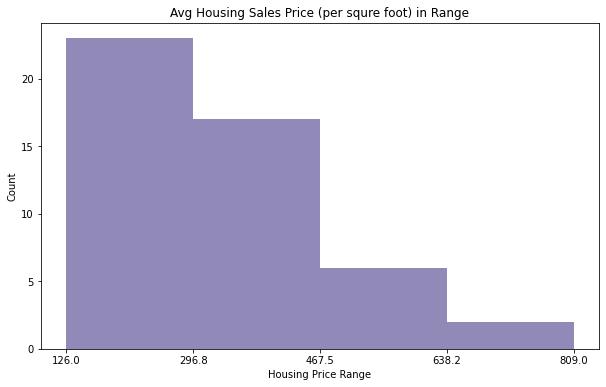

In [91]:
count, bin_edges = np.histogram(dfs1['median House Price per squre foot'],4)


dfs1['median House Price per squre foot'].plot(kind ='hist', 
          figsize=(10, 6),
          alpha=0.6,
          bins=4,                                  
          xticks=bin_edges,
          color=['darkslateblue']
         )

plt.title('Avg Housing Sales Price (per squre foot) in Range') # add a title to the histogram
plt.ylabel('Count') # add y-label
plt.xlabel('Housing Price Range') # add x-label

plt.show()

#### As it seems in above histogram, we can define the ranges as below:

##### 0-296.8: “Low Level HSP”
##### 296.8-467.5: “Mid Level HSP”
##### 467.5-638.2: “Medium High HSP”
##### 638.2-809: “High Level HSP”

In [57]:
dfs2=pd.merge(        dfs,  
                     ma_grouped,  
                     on ='City',  
                     how ='inner')
print(dfs2.shape)
dfs2.head()

(48, 232)


,City,Venue Category,median House Price per squre foot,estimated_population,ATM,American Restaurant,Antique Shop,Art Gallery,Art Museum,Arts & Crafts Store,...,Venezuelan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Yoga Studio
0,Leominster,1,187.0,42223,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Springfield,2,127.0,155472,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Peabody,3,284.0,53676,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Melrose,4,372.0,28369,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Holyoke,4,126.0,40266,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [103]:
#Feature = dfs2[['City','Venue Category','estimated_population','1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue','4th Most Common Venue','5th Most Common Venue','6th Most Common Venue','7th Most Common Venue','8th Most Common Venue','9th Most Common Venue','10th Most Common Venue']]
# Feature=dfs2.drop(['median House Price per squre foot','City'],axis=1)
# Feature.head()
# X = Feature
# y = dfs2['City'].values


#Feature=matop10_onehot.drop(['City','Venue Category','median House Price per squre foot','estimated_population'],axis=1)
Feature=matop10_onehot.drop(['City','Venue Category'],axis=1)
Feature.head()
X = Feature
y=matop10_onehot['City'].values
# Clus_dataSet = StandardScaler().fit_transform(X)
# Clus_dataSet

# #Normalize Data 
# X= preprocessing.StandardScaler().fit(X).transform(X)
# X[0:5]

# Feature=dfs1.drop(['median House Price per squre foot','City'],axis=1)
# Feature.head()
# X = Feature
# y = dfs1['median House Price per squre foot'].values

# #Normalize Data 
# X= preprocessing.StandardScaler().fit(X).transform(X)
# X[0:5]

In [104]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=6)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)


Train set: (28, 324) (28,)
Test set: (20, 324) (20,)


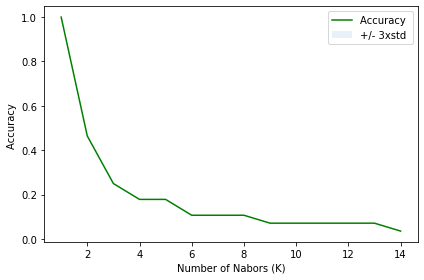

The best accuracy was with 1.0 with k= 1


In [108]:
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as metrics

# k = 1
# neigh6 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
# yhat6 = neigh6.predict(X_test)
# print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh6.predict(X_train)))
# print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat6))

Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] =metrics.accuracy_score(y_train, neigh.predict(X_train))

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

#Plot
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 




In [106]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.0

In [107]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,average='micro')

0.0

In [ ]:
# 